In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import sys
sys.path.append("../")
from simulate import gen_bursts, run_search, analyse_and_plot
from utils import *
from plotting import set_size

%matplotlib inline

Simulated bursts

In [2]:
np.random.seed(1996)

bursts, name = gen_bursts(
    mu_params=[1650, 250],
    sigma_params=[300, 250],
    mu_dist="norm",
    sigma_dist="norm",
    N=50000,
    alpha=-1.5,
    E_min_log=37,
    E_max_log=42,
    save=False,
)

detected, detected_in_band_df, Es = run_search(
    bursts,
    fstart=1050,
    fend=1450,
    fluence_threshold=0.2,
    in_band_sig=3,
    ret="all",
    distance=949,
)

original_E = Es["original_E"]
detected_snr_E = Es["detected_snr_E"]
detected_fit_E = Es["detected_fit_E"]
detected_in_band_E = Es["detected_in_band_E"]

FAST FRB121102 bursts

In [3]:
fast_121102 = pd.read_csv('../fastbursts.csv')
fast_energy = fluence_to_energy(fast_121102['fluence']/1000, fast_121102['bw']*1000, 
                                    distance=949)

Arecibo FRB121102 bursts

In [4]:
arecibo_121102 = pd.read_csv('../all_bursts_bary.csv')

arecibo_121102 = arecibo_121102[arecibo_121102['use_fluence']]
arecibo_121102 = arecibo_121102[arecibo_121102['fit_method'] == 'mcmc']

# Selecting in-band bursts
m1 = (arecibo_121102['$\mu_f$ (MHz)'] - 1.0 * arecibo_121102["$\sigma_f$ (MHz)"] > 974)
m2 = (arecibo_121102['$\mu_f$ (MHz)'] + 1.0 * arecibo_121102["$\sigma_f$ (MHz)"] < 1774)
mask = m1 & m2
arecibo_121102_in = arecibo_121102[mask]
arecibo_121102_all = arecibo_121102

arecibo_energy_in = fluence_to_energy(arecibo_121102_in['$S$ (Jy ms)']/1000, 
                                      arecibo_121102_in['$\sigma_f$ (MHz)']*2.355,
                                      distance=949)
arecibo_energy_all = fluence_to_energy(arecibo_121102_all['$S$ (Jy ms)']/1000, 
                                       arecibo_121102_all['$\sigma_f$ (MHz)']*2.355,
                                       distance=949)

Plot energy distributions

/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10


[Text(34.0, 0, '$\\mathdefault{34}$'), Text(35.0, 0, '$\\mathdefault{35}$'), Text(36.0, 0, '$\\mathdefault{36}$'), Text(37.0, 0, '$\\mathdefault{37}$'), Text(38.0, 0, '$\\mathdefault{38}$'), Text(39.0, 0, '$\\mathdefault{39}$'), Text(40.0, 0, '$\\mathdefault{40}$')]
['$\\mathdefault{10^{34}}$', '$\\mathdefault{10^{35}}$', '$\\mathdefault{10^{36}}$', '$\\mathdefault{10^{37}}$', '$\\mathdefault{10^{38}}$', '$\\mathdefault{10^{39}}$', '$\\mathdefault{10^{40}}$']
[Text(0, -1.0, '$\\mathdefault{−1}$'), Text(0, 0.0, '$\\mathdefault{0}$'), Text(0, 1.0, '$\\mathdefault{1}$'), Text(0, 2.0, '$\\mathdefault{2}$'), Text(0, 3.0, '$\\mathdefault{3}$'), Text(0, 4.0, '$\\mathdefault{4}$')]
['$\\mathdefault{10^{−1}}$', '$\\mathdefault{10^{{0}}$', '$\\mathdefault{10^{{1}}$', '$\\mathdefault{10^{{2}}$', '$\\mathdefault{10^{{3}}$', '$\\mathdefault{10^{{4}}$']


/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/kshitij/anaconda3/envs/grbfrb/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator


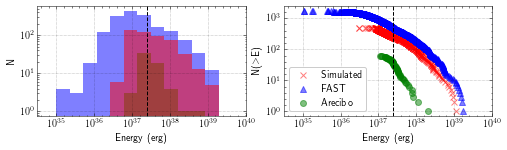

In [6]:
bins = np.linspace(35, 40, 15)
with plt.style.context(["science", "grid"]):
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=set_size(width="full", 
                                                               subplots=(1, 2)))
    ax[0].hist(np.log10(fast_energy), bins=bins, color='b',# density=True,
               alpha=0.5, label='FAST')
    ax[0].hist(np.log10(arecibo_energy_in), bins=bins, color='g',# density=True, 
               alpha=0.5, label='Arecibo')
    ax[0].hist(np.log10(detected_snr_E), bins=bins, color='r', 
               alpha=0.5, label='Simulated')
    ax[0].axvline(x=np.log10(2.5) + 37, ymin=0, ymax=1000, 
                  color='k', linestyle='--')

    Es_bw = np.sort(detected_snr_E)
    Ns_bw = np.linspace(len(Es_bw) - 1, 0, len(Es_bw))
    ax[1].scatter(np.log10(Es_bw), np.log10(Ns_bw), c='r', 
                  marker='x', alpha=0.5, label='Simulated')


    Es_bw = np.sort(fast_energy)
    Ns_bw = np.linspace(len(Es_bw) - 1, 0, len(Es_bw))
    ax[1].scatter(np.log10(Es_bw), np.log10(Ns_bw), c='b', 
                  marker='^', alpha=0.5, label='FAST')

    Es_bw = np.sort(arecibo_energy_in)
    Ns_bw = np.linspace(len(Es_bw) - 1, 0, len(Es_bw))
    ax[1].scatter(np.log10(Es_bw), np.log10(Ns_bw), c='g', 
                  marker='o', alpha=0.5, label='Arecibo')
    ax[1].legend()

    ax[1].axvline(x=np.log10(2.5) + 37, ymin=0, ymax=1000, 
                  color='k', linestyle='--')


    ax[0].set_yscale('log')
    ax[0].set_xlabel(r'Energy (erg)')
    ax[1].set_xlabel(r'Energy (erg)')
    ax[0].set_ylabel(r'N')
    ax[1].set_ylabel(r'N($>$E)')

    ax[1].set_xlim([34.5, 40])
    plt.tight_layout()
    print(ax[0].get_xticklabels())
    new_labels = []
    for l in ax[0].get_xticklabels():
        new_labels.append("$\\mathdefault{10^{" + l._text[-4:-2] + "}}$")
    print(new_labels)
    ax[0].set_xticklabels(new_labels)

    print(ax[1].get_yticklabels())
    new_labels = []
    for l in ax[1].get_yticklabels():
        new_labels.append("$\\mathdefault{10^{" + l._text[-4:-2] + "}}$")
    print(new_labels)
    ax[1].set_yticklabels(new_labels)

    plt.savefig('121102_energies.pdf', bbox_inches='tight', dpi=300)